# Project


## Name: Reem Almijmaj
## Github Username: reemabdullah888
## USC ID: 3217747723

# Please Note:
1) I Only uploaded my note based on post that stated we do not have to upoad anthing other than our code. 

In [10]:
import os
import shutil
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import splitfolders
from matplotlib.pyplot import figure

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, Model
import cv2
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator

# protoc >= 3.19.0.



# pip install --upgrade <package>==<version>

# !pip install --upgrade tensorflow==2.9 --user
# 
# !pip show tensorflow
# !pip install --upgrade protobuf==2.6.1 --user   
# !pip install keras==3.19.0 --user
# !pip install split-folders
# !pip install opencv-python
# !pip install livelossplot
# !pip install seaborn
# ! pip install tensorflow==2.8

# protoc >= 3.19.0
# tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.6.0 which is incompatible.




from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset


from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import BatchNormalization , GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.layers import GlobalMaxPooling2D,Dropout, Dense, Input  # MaxPooling2D,MaxPooling3D
from livelossplot.inputs.keras import PlotLossesCallback
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.applications import EfficientNetB0

# B :   Data Exploration and Pre-processing

In [6]:
# Read datasets images folders names
fileDir = os.path.dirname(os.path.realpath('__file__'))
myPath=fileDir +'/data/images'

# Name of folders
listOfDirs = []
for d in os.listdir(myPath):
    if os.path.isdir(os.path.join(myPath, d)):
        listOfDirs.append(d)
        
# directories = listOfDirs[:-3]


# i
Images in each class are given in separate folders. The file Classes.xlsx provides the classes assigned to the bird species images in each folder. Therefore,
you encode your classes using one-hot encoding and Classes.xlsx

In [7]:
# Read Classes file 
data_classes = pd.read_excel(fileDir+'/data/Classes.xlsx')
display(data_classes )

,Folder Name,Class
0,005.Crested_Auklet,0
1,013.Bobolink,1
2,015.Lazuli_Bunting,2
3,023.Brandt_Cormorant,3
4,040.Olive_sided_Flycatcher,4
5,041.Scissor_tailed_Flycatcher,5
6,067.Anna_Hummingbird,6
7,072.Pomarine_Jaeger,7
8,076.Dark_eyed_Junco,8
9,081.Pied_Kingfisher,9


In [8]:
# One hot encoding for class file 
ohe = OneHotEncoder()
transformed = ohe.fit_transform(data_classes[['Class']])
print(transformed.toarray())


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.

# ii
Randomly select 0.7 images from each folder as your training set, 0.15 as validation set, and the rest as your test set


## NOTE:
##### The splitting ratio I used BEFORE WAS (.7, .15, .15) But that NOT provided me with the ratio the project description asked me to do  since the folders have different numbers of images. The ratio I did HERE  (.715,.16,.125) is Correct and definitely will select .7 for training images and .15 for the validation set. YOU can check the pictures that I uploaded to the model. and the number of images i save in the local folder. 
<br>
please refer to @2023 piaza post

In [11]:

# Create a new path for the splited datasets
split_Path=fileDir +'/data/splited_data'
source_path = myPath
splitfolders.ratio(source_path,output=split_Path,ratio=(.715,.16,.125))   


Copying files: 1176 files [00:11, 103.03 files/s]


In [12]:
# Counting the number of images in each class for training data
for i in listOfDirs:
    print('Training {} images are: '.format(i)+str(len(os.listdir(split_Path+'/train/'+i+'/'))))
  

Training 005.Crested_Auklet images are: 31
Training 013.Bobolink images are: 42
Training 015.Lazuli_Bunting images are: 41
Training 023.Brandt_Cormorant images are: 42
Training 040.Olive_sided_Flycatcher images are: 42
Training 041.Scissor_tailed_Flycatcher images are: 42
Training 067.Anna_Hummingbird images are: 42
Training 072.Pomarine_Jaeger images are: 42
Training 076.Dark_eyed_Junco images are: 42
Training 081.Pied_Kingfisher images are: 42
Training 082.Ringed_Kingfisher images are: 42
Training 086.Pacific_Loon images are: 42
Training 099.Ovenbird images are: 42
Training 104.American_Pipit images are: 42
Training 127.Savannah_Sparrow images are: 42
Training 135.Bank_Swallow images are: 42
Training 141.Artic_Tern images are: 41
Training 149.Brown_Thrasher images are: 42
Training 156.White_eyed_Vireo images are: 42
Training 168.Kentucky_Warbler images are: 42


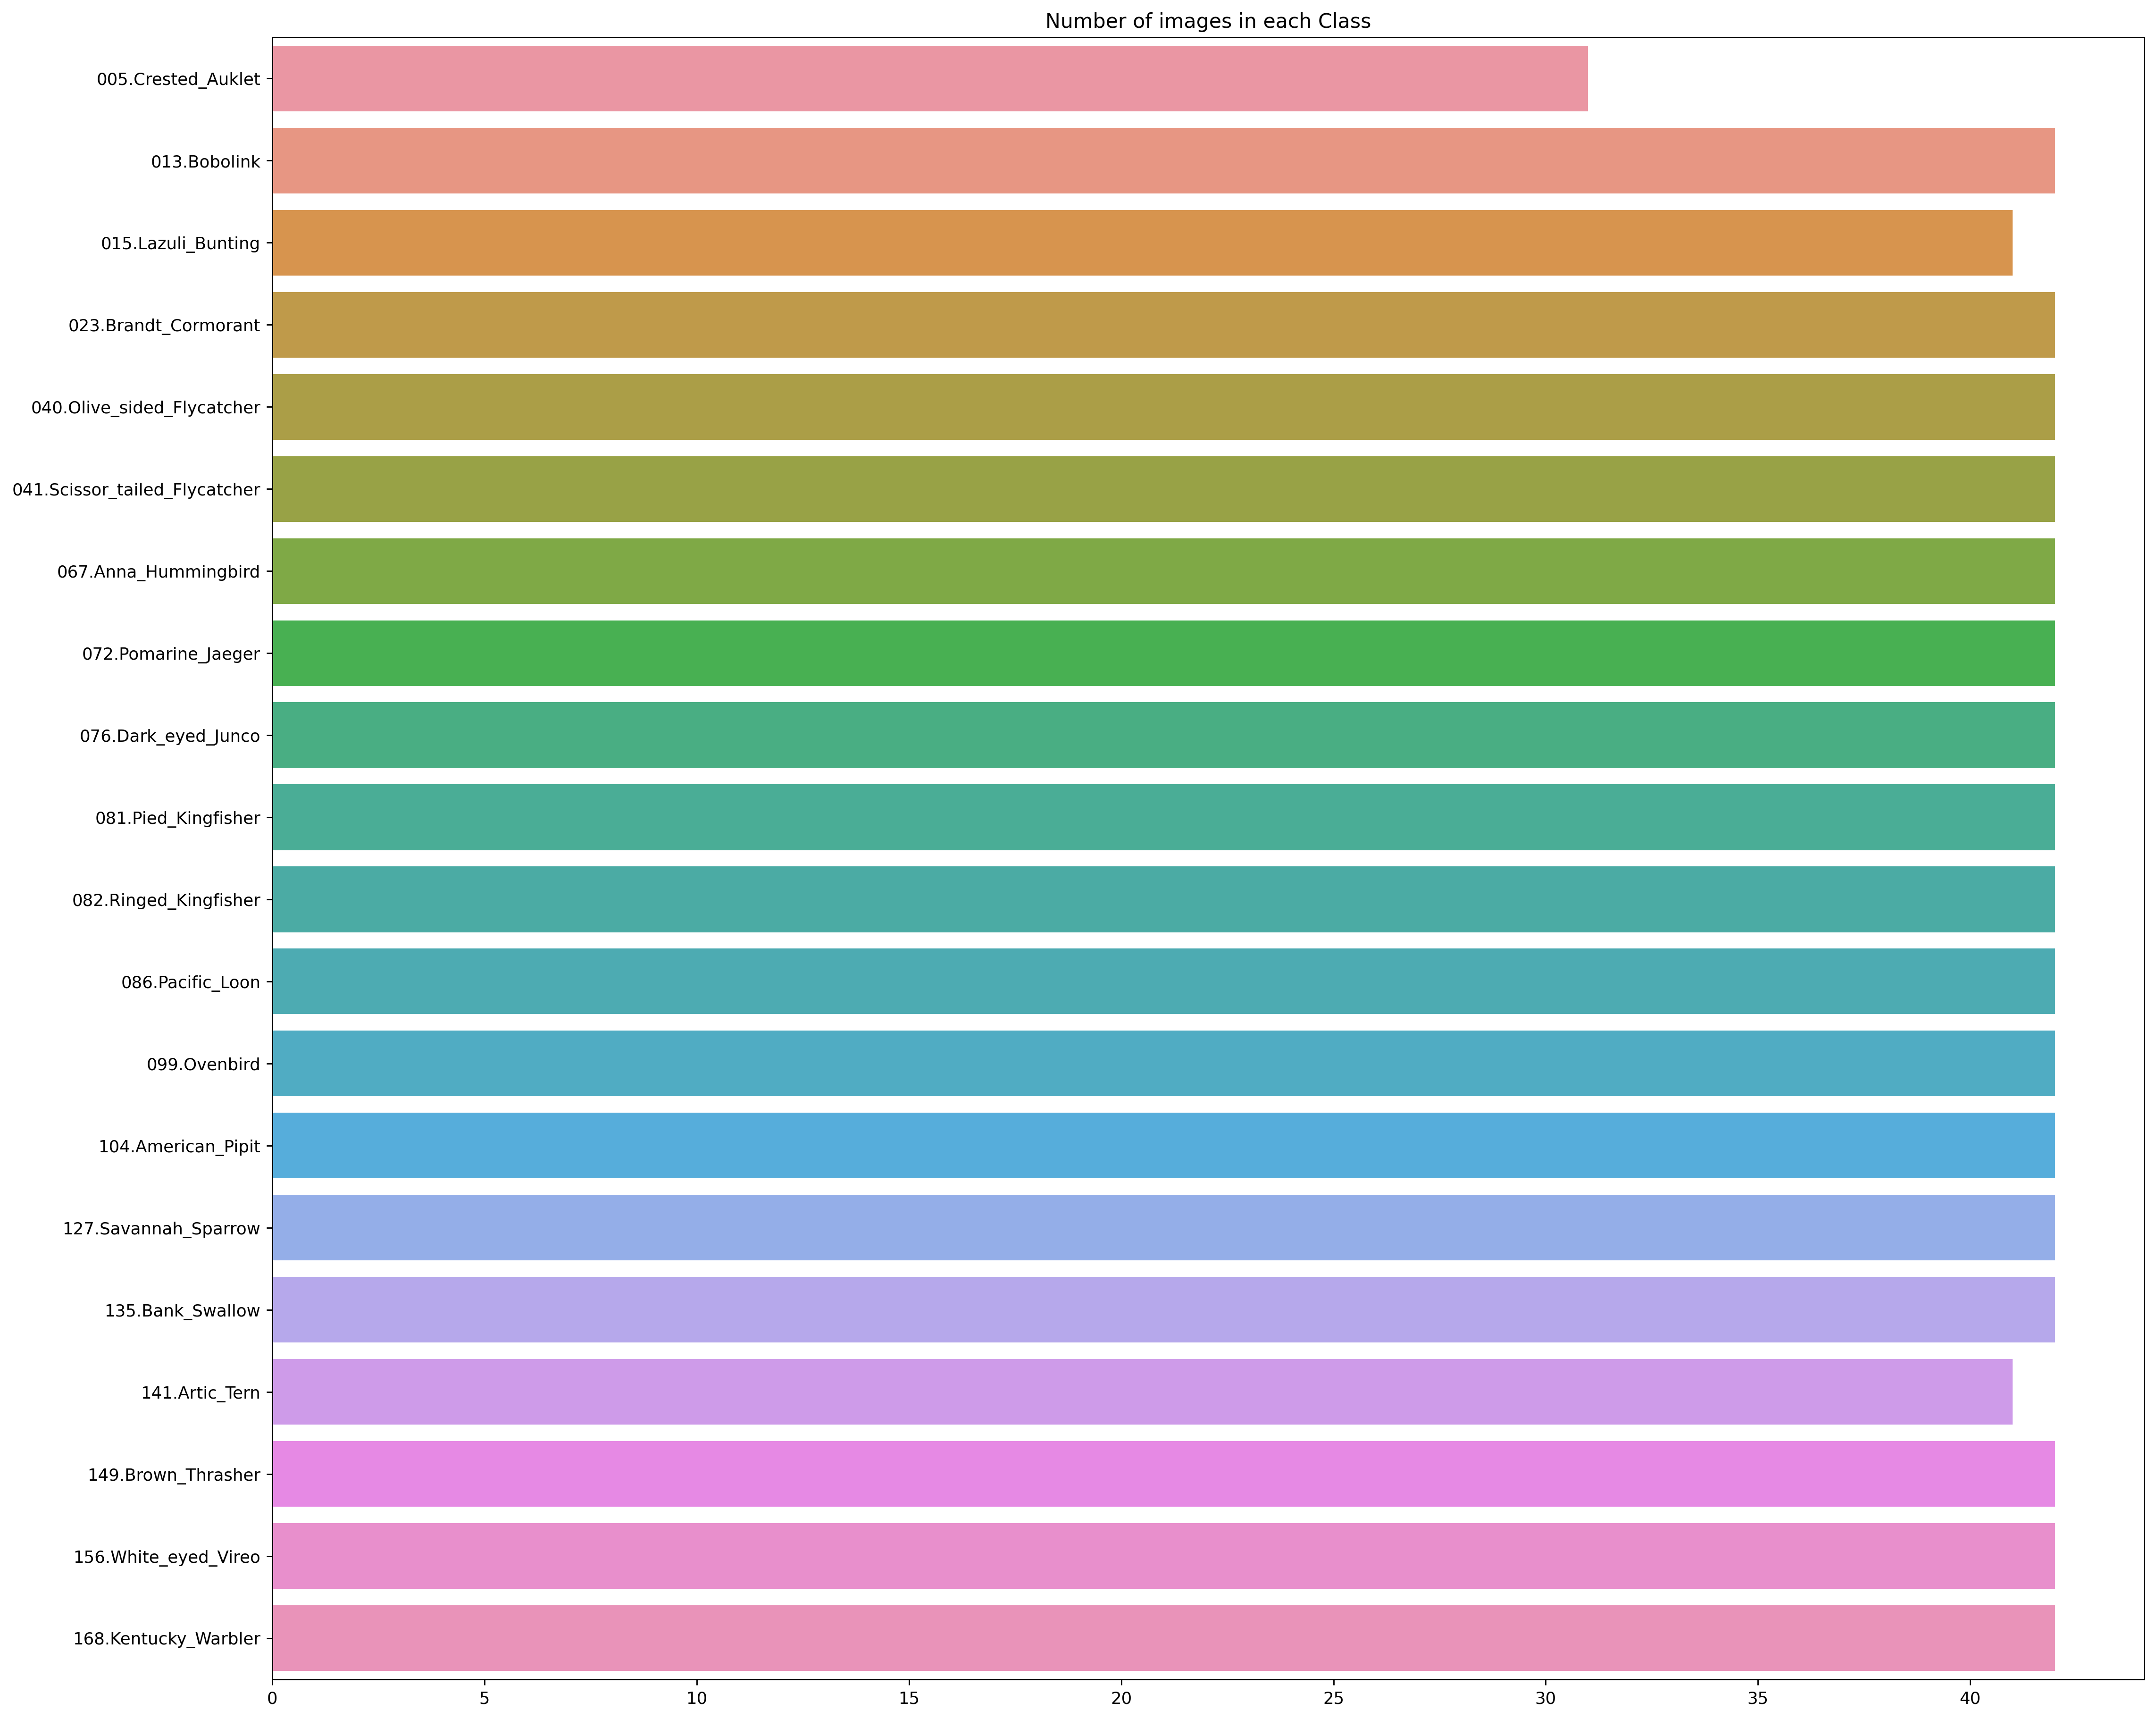

In [13]:
# Cheaking Classes Distribution for training data

nimgs = {}
for i in listOfDirs:
    nimages = len(os.listdir(split_Path+'/train/'+i+'/'))
    nimgs[i]=nimages   

figure(num=None, figsize=(20,18), dpi=256, facecolor='w', edgecolor='r')
plt.title("Number of images in each Class")
sns.barplot(list(nimgs.values()), list(nimgs.keys()))
plt.show()


# iii

In order for all the images to have the same size, zero-pad or resize the images in your dataset. This can be done using various tools, including OpenCV

In [14]:

#Organizing my folders path 
dataPath = fileDir+'/data/'
splitedPath=dataPath+'splited_data'
train_split_path = splitedPath+'/train/'
test_split_path = splitedPath+'/test/'
validation_split_path = splitedPath+'/val/'

##### I am doing resizing for all the datasets. For  the traning images, testing images and the validation images

In [15]:
# reszie the traning images
for folder in os.listdir(train_split_path):
    path = os.path.join(train_split_path,folder)
    for image in os.listdir(path):
        # create a path for each train original image
        image_path = os.path.join(path,image)
        #read the image
        img = cv2.imread(image_path)
        #resize the image
        img_r = cv2.resize(img, (224, 224))
        #Save resized image into its original folder
        cv2.imwrite(image_path, img_r)
        

# reszie the testing images
for folder in os.listdir(test_split_path):
    path = os.path.join(test_split_path,folder)
    for image in os.listdir(path):
        image_path = os.path.join(path,image)
        img = cv2.imread(image_path)
        img_r = cv2.resize(img, (224, 224))
        cv2.imwrite(image_path, img_r)
        

# reszie the validation images
for folder in os.listdir(validation_split_path):
    path = os.path.join(validation_split_path,folder)
    for image in os.listdir(path):
        image_path = os.path.join(path,image)
        img = cv2.imread(image_path)
        img_r = cv2.resize(img, (224, 224))
        cv2.imwrite(image_path, img_r)     

# Image pre-processing


In [16]:
# #Do Not Re-Run

# Create image augmentation folder to store all the modified traning images 
augment_path = os.path.join(dataPath, 'Augmented_img')
os.mkdir(augment_path)

#Under image augmentation folder, create 20 sub folders 
for folder in listOfDirs:
    x = os.path.join(augment_path,folder)
    os.mkdir(x)


# C:    ii

Perform empirical regularization, Zooing, rotate, flip, contrast, images in your training set for image augmentation. You can use various tools to do this, including OpenCV.

In [17]:
# Image augmentaion 
augm_path = augment_path+'/'

for folder in os.listdir(train_split_path):
    path = os.path.join(train_split_path,folder)
    for image in os.listdir(path):
        # create a path for each original image
        image_path = os.path.join(path,image)
        #read the image
        img = cv2.imread(image_path)
        
        
        #rotate
        rot_img = cv2.flip( img, cv2.ROTATE_180 )
        #Save rotated image into subfolders of augmented_image folder
        store_rotate = augm_path+folder+f"/rotated_{image}"
        cv2.imwrite(store_rotate, rot_img)
        
        #contrast
        con_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        store_c =augm_path+folder+f"/contrast_{image}"
        cv2.imwrite(store_c, con_img)
        
                
        #Flip
        horizontal_img = cv2.flip(img, 0 )
        #Save each fliped image into subfolders of flip folder
        store_f = augm_path+folder+f"/fliped_{image}"
        cv2.imwrite(store_f, horizontal_img)
        
        
        # For the Zoom and cropping I decided to go with different tools 
        
#         #Zoom
#         scaleX = 0.6
#         scaleY = 0.6
#         scaleUp = cv2.resize(img, None, fx= scaleX*3, fy= scaleY*3, interpolation= cv2.INTER_LINEAR)
#         store_zoom = augm_path+folder+f"/zoomed_{image}"
#         cv2.imwrite(store_zoom, scaleUp)
        
        
        
#         # Cropping an image
       
    #crop and the same time fill with padding so the image still not lossing any size
        tf.image.resize_image_with_crop_or_pad(img, 224, 224)
        store_crop = augm_path+folder+f"/crop_{image}"
        cv2.imwrite(store_crop, cropped_image)
        
        
        

In [48]:
# Translate the traning images 

                
def translateImg( img, offsetx,offsety):
    
    trans_mat = (Mat_<double>(2,4) << 1, 0, offsetx, 0, 1, offsety)
    warpAffine(img,img,trans_mat,img.size())
    store_translate = augm_path+folder+f"/translate_{img}"
    cv2.imwrite(store_translate, img)


for folder in os.listdir(train_split_path):
    path = os.path.join(train_split_path,folder)
    for image in os.listdir(path):
        translateImg(image,0,-10)


In [18]:
# Coping the original traning images into the augmented images folder
for f1 in os.listdir(train_split_path):
    for f2 in os.listdir(augm_path):
        if f1==f2:
            original = train_split_path+f1+'/'
            augment = augm_path+f2+'/'
            for image in os.listdir(original):
                shutil.copy(original+image,augment)

##### Now , I have a large traning set to wrok and train the model with !

# C: Transfer Learning

i ) 
When dealing with classification of relatively small image datasets, deep networks may not perform very well because of not having enough data to train
them. In such cases, one usually uses transfer learning, which uses deep
learning models that are trained on very large datasets such as ImageNet
as feature extractors. The idea is that such deep networks have learned to
extract meaningful features from an image using their layers, and those features can be used in learning other tasks. In order to do that, usually the
last layer or the last few layers of the pre-trained network are removed, and
the response of the layer before the removed layers to the images in the new
dataset is used as a feature vector to train one more multiple replacement layers. The dataset in this task has only around 50-60 images per class. Given
that we have 20 classes, training a deep network with such a small dataset
may not yield desirable results. In this project, you will use pre-trained models EfficientNetB0 and VGG16. For both pre-trained networks, you will only
train the last fully connected layer, and will freeze all layers before them (i.e.
we do not change their parameters during training) and use the outputs of the
penultimate layer in the original pre-trained model as the features extracted
from each image.

#### Preparing all the images for traning the models 

In [19]:
# label_mode = 'categorical'      labels='inferred'
# class_mode='categorical' me

# Upload the images data
# Do one-hot-incoding to the classes 


# Train 

# Rescaling by 1.0/255 to normalize the rgb values to improve the model performance
t_datagen = ImageDataGenerator( zoom_range=0.2)  #Randomly zooming
# this is a generator that will read pictures found in the augmentaion images folder
Train_generator = t_datagen.flow_from_directory(augm_path, batch_size=5, class_mode='categorical', target_size=(224, 224), shuffle = True) # all images will be resized to 224x224)



#Validation
validation_datagen = ImageDataGenerator() # only rescaling for validation images
Validation_generator = validation_datagen.flow_from_directory(validation_split_path ,target_size=(224, 224),batch_size=5,class_mode='categorical', shuffle = False)                                               
                                               
                                                                                            
#Test                                           
test_datagen = ImageDataGenerator()  # only rescaling for test images
Test_generator = test_datagen.flow_from_directory(test_split_path ,target_size=(224, 224),batch_size=5,class_mode='categorical', shuffle = False)                                               



Found 3308 images belonging to 20 classes.
Found 178 images belonging to 20 classes.
Found 171 images belonging to 20 classes.


# First pre-trained model     :     VGG16

# iii
Use ReLU activation functions in the last layer and a softmax layer, along with batch normalization 4 and a dropout rate of 20% as well as ADAM. <br>
optimizer. Use multinomial cross entropy loss. You can try any batch size,
but a batch size of 5 seems reasonable.


In [32]:
# Creating the architecture of the vgg16 model
v_model= VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))# I am removing default classifier from VGG when I set include top = FALSE


# Freeze all the previous learned layers in VGG16 model
for layer in v_model.layers:
    layer.trainable = False


# modifying the last layer for our classes.
last_layer = v_model.get_layer('block5_pool')
# Create a new 'top' of the model (i.e. fully-connected layers). Which mean getting the output of the penultimate layer in the original pretrained model
last_output = last_layer.output
# adding one max polling
top_model = tf.keras.layers.GlobalMaxPooling2D()(last_output)
top_model = BatchNormalization()(top_model)
# adding dense layer with relu activation function
top_model = tf.keras.layers.Dense(512, activation='relu')(top_model)
#adding one dropout layer
top_model = tf.keras.layers.Dropout(rate=.2)(top_model)
# adding the final dense layer with sofmax activation function and 20 as the number of classes
top_model = tf.keras.layers.Dense(20, activation = 'softmax')(top_model)

# merge the original VGG-16 layers, with our custom layers
model = tf.keras.Model(v_model.input, top_model)
   
# compile the model, before training
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

print('The summary of VGG16 model:')
print(model.summary())



The summary of VGG16 model:
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (N

# iv
Train the networks (EfficientNetB0 and VGG16) for at least 50 epochs (preferably 100 epochs) and perform early stopping using the validation set.<br>
Keep the network parameters that have the lowest validation error. Plot the training and validation errors vs. epochs.


In [33]:
# The file path to store the best model locally
filepath=dataPath+'best_model.hdf5'

# ModelCheckpoint callback - save best weights
# saving the best model, so that even if the kernel crashes due to unexpected circumstances, we can start the training from the best weights we have computed so far. 
check_point = ModelCheckpoint(filepath,save_best_only=True,verbose=2)



# EarlyStopping

# implement early stopping, i.e., if it isn’t learning anymore, it can stop the model 
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')

 

### Train the VGG16 model

In [34]:
# Train the model

vgg_history = model.fit(Train_generator,
                            epochs=50,
                            validation_data=Validation_generator,
                            callbacks=[check_point, early_stop],
                            verbose=2)

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.15391, saving model to C:\Users\MLI7_\Desktop\ML\Project/data\best_model.hdf5
662/662 - 1303s - loss: 1.9069 - accuracy: 0.4510 - val_loss: 1.1539 - val_accuracy: 0.7022 - 1303s/epoch - 2s/step
Epoch 2/50

Epoch 2: val_loss did not improve from 1.15391
662/662 - 790s - loss: 1.3060 - accuracy: 0.6091 - val_loss: 1.2468 - val_accuracy: 0.7191 - 790s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 1.15391
662/662 - 718s - loss: 1.1231 - accuracy: 0.6581 - val_loss: 1.4765 - val_accuracy: 0.6966 - 718s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss did not improve from 1.15391
662/662 - 717s - loss: 1.0425 - accuracy: 0.6805 - val_loss: 1.4898 - val_accuracy: 0.6798 - 717s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 1.15391
662/662 - 754s - loss: 0.9633 - accuracy: 0.7089 - val_loss: 1.5962 - val_accuracy: 0.7022 - 754s/epoch - 1s/step
Epoch 6/50

Epoch 6: val_loss did not improve from 1.15391
66

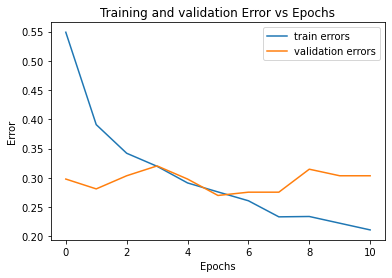

In [35]:


#getting accuracy values 
accuracy = vgg_history.history['accuracy']
#getting train error
train_err = [1-x for x in accuracy]


#getting epochs list of number
epochs=range(1,len(accuracy )+1)


# getting validation accuracy 
val_acc=vgg_history.history['val_accuracy']
#getting validation error
validation_err = [1-x for x in val_acc]

# Ploting the train and validation errors vs. epochs
plt.plot(train_err)
plt.plot(validation_err)
plt.title('Training and validation Error vs Epochs')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(['train errors', 'validation errors'])
plt.show()

#### Checking performance on Test Data 

In [36]:



# Generate predictions
model.load_weights(filepath) # initialize the best trained weights

true_classes = Test_generator.classes
# class_indices = Train_generator.class_indices
# class_indices = dict((v,k) for k,v in class_indices.items())


# Testing the model on testing data
vgg_preds = model.predict(Test_generator)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

35/35 [==============================] - 29s 821ms/step


In [37]:
#### Checking Vgg16 accuracy


vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy 71.35%


# V
Report Precision, Recall, and F1 score for your model. Remember that this is a multi-class classification problem.

In [38]:


from sklearn import metrics
print('The Precison, Recall and F1 score for VGG16 model')
print(metrics.classification_report(true_classes, vgg_pred_classes)) 

The Precison, Recall and F1 score for VGG16 model
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.78      0.78      0.78         9
           2       0.86      0.75      0.80         8
           3       0.86      0.75      0.80         8
           4       0.80      0.44      0.57         9
           5       1.00      0.67      0.80         9
           6       1.00      0.89      0.94         9
           7       0.67      0.89      0.76         9
           8       0.78      0.78      0.78         9
           9       0.89      0.89      0.89         9
          10       0.70      0.78      0.74         9
          11       1.00      1.00      1.00         9
          12       0.54      0.78      0.64         9
          13       0.80      0.44      0.57         9
          14       0.55      0.67      0.60         9
          15       1.00      0.38      0.55         8
          16       0.80      1.

# Second pre-trained model     :   EfficientNetB0

In [39]:
# Creating the architecture of the EfficientNetB0 model
E_model= EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224,224,3))


# Freeze all the previous learned layers in VGG16 model
for layer in E_model.layers:
    layer.trainable = False
    

# modifying the last layer for our classes.
last_layer = E_model.get_layer('top_activation')

# Create a new 'top' of the model (i.e. fully-connected layers). Which mean getting the output of the penultimate layer in the original pretrained model
last_output = last_layer.output
# adding one max polling
top_model = tf.keras.layers.GlobalMaxPooling2D()(last_output)
top_model = BatchNormalization()(top_model)
# adding dense layer with relu activation function
top_model = tf.keras.layers.Dense(512, activation='relu')(top_model)
#adding one dropout layer
top_model = tf.keras.layers.Dropout(rate=.2)(top_model)

# adding the final dense layer with sofmax activation function and 20 as the number of classes
top_model = tf.keras.layers.Dense(20, activation = 'softmax')(top_model)

# merge the original EfficientNetB0 layers, with our custom layers
model_2 = tf.keras.Model(E_model.input, top_model)
   
# compile the model, before training
model_2.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

print('The summary of EfficientNetB0:')
print(model_2.summary())

The summary of EfficientNetB0:
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 224, 224, 3)  0       

 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_e

 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )        

 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_s

 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_d

 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_e

 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
          

In [ ]:

# Pre-traning the model on the best weights 
# model = EfficientNetB1(weights="efficientnetb1_notop.h5", include_top=False)

##### Save best model and  EarlyStopping

In [54]:
# The file path to store the best model locally
filepath=dataPath+'EfficientNetB0_best_model.hdf5'

# ModelCheckpoint callback - save best weights
check_point = ModelCheckpoint(filepath,save_best_only=True,verbose=2)



# EarlyStopping

# if it isn’t learning anymore, it can stop the model 
early_stop = EarlyStopping(monitor='val_loss',
                           patience=10,
                           restore_best_weights=True,
                           mode='min')



#### Train EfficientNetB0 model

In [41]:
# Train the model

eff_history = model_2.fit(Train_generator,
                            epochs=50,
                            validation_data=Validation_generator,
                            callbacks=[check_point, early_stop],
                            verbose=2)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.79180, saving model to C:\Users\MLI7_\Desktop\ML\Project/data\EfficientNetB0_best_model.hdf5
662/662 - 183s - loss: 1.5773 - accuracy: 0.6103 - val_loss: 0.7918 - val_accuracy: 0.8652 - 183s/epoch - 276ms/step
Epoch 2/50

Epoch 2: val_loss did not improve from 0.79180
662/662 - 172s - loss: 1.0345 - accuracy: 0.7382 - val_loss: 1.0763 - val_accuracy: 0.8652 - 172s/epoch - 259ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.79180
662/662 - 169s - loss: 0.8289 - accuracy: 0.7751 - val_loss: 1.1825 - val_accuracy: 0.8596 - 169s/epoch - 255ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 0.79180
662/662 - 173s - loss: 0.7319 - accuracy: 0.8014 - val_loss: 1.0674 - val_accuracy: 0.8202 - 173s/epoch - 262ms/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.79180
662/662 - 170s - loss: 0.7254 - accuracy: 0.8029 - val_loss: 1.1575 - val_accuracy: 0.8708 - 170s/epoch - 257ms/step
Epoch 6/50

Epoch 6: val_loss did

#### Train and Validation errors vs Epochs

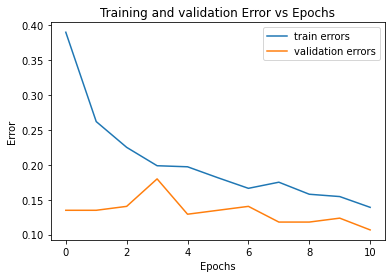

In [49]:

#getting accuracy values 
accuracy =eff_history.history['accuracy']
#getting train error
train_err = [1-x for x in accuracy]


#getting epochs list of number
epochs=range(1,len(accuracy )+1)


# getting validation accuracy 
val_acc=eff_history.history['val_accuracy']
#getting validation error
validation_err = [1-x for x in val_acc]

# Ploting the train and validation errors vs. epochs
plt.plot(train_err)
plt.plot(validation_err)
plt.title('Training and validation Error vs Epochs')
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend(['train errors', 'validation errors'])
plt.show()

#### Checking performance on Test Data 

In [57]:

model_2.load_weights(dataPath+'EfficientNetB0_best_model.hdf5') 

true_classes = Test_generator.classes

eff_preds = model_2.predict(Test_generator)
eff_pred_classes = np.argmax(eff_preds, axis=1)

35/35 [==============================] - 9s 212ms/step


#### Report Precision, Recall, and F1 score 

In [58]:
print('The Precison, Recall and F1 score for EfficientNetB0 model')
print(metrics.classification_report(true_classes, eff_pred_classes)) 

The Precison, Recall and F1 score for EfficientNetB0 model
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       0.90      1.00      0.95         9
           2       0.89      1.00      0.94         8
           3       0.89      1.00      0.94         8
           4       0.70      0.78      0.74         9
           5       1.00      0.56      0.71         9
           6       1.00      1.00      1.00         9
           7       0.64      1.00      0.78         9
           8       0.82      1.00      0.90         9
           9       1.00      1.00      1.00         9
          10       1.00      0.89      0.94         9
          11       1.00      0.67      0.80         9
          12       1.00      0.78      0.88         9
          13       0.88      0.78      0.82         9
          14       0.82      1.00      0.90         9
          15       0.56      0.62      0.59         8
          16       1.0

# Resources: <br>
1) https://www.geeksforgeeks.org/resize-multiple-images-using-opencv-python/ <br>
2) https://www.tensorflow.org/tutorials/images/transfer_learning <br>
3) https://www.tensorflow.org/tutorials/images/data_augmentation <br>
4) https://www.tensorflow.org/tutorials/load_data/images <br>
5) https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/ <br>
6) https://www.youtube.com/watch?v=UPljwpNKMOM <br>
7) https://www.youtube.com/watch?v=Clo1HKB50Ug&list=RDCMUCJPihOKkiT7TqP7NK9-GtuQ&index=22 <br>
8) https://www.youtube.com/watch?v=JcU72smpLJk&list=RDCMUCJPihOKkiT7TqP7NK9-GtuQ&index=3  <br>
9) https://stackoverflow.com/questions/60110053/how-do-i-print-sample-images-preferably-with-class-after-using-keras-imagedata <br>
10) https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/